## Part II. 3D rendering
### A. Rendering of basic objects.
In this part we are going to test the rendering of simple 3D objects. Download the notebook opengl3d.ipynb. 
1. Execute cells #1 − 4 and explain what each of these cells do. If pyOpenGL has been installed correctly you should see for Cell #1 and #2 what is displayed in Figure 1.  Detailed explanation of each cell is provided below.
2. What are the input parameters of the function gluPerspective? What
is its role? What is the difference between this function and glFrustum?

`gluPerspective` sets up a perspective projection matrix. The four parameters are: 


*   `fovy` - it specifies a view angle, in degrees, in the y direction.
*   `aspect` - it specifies the aspect ratio, in the x direction. The aspect ratio is the ratio of x (width) to y (height).
*   `zNear` - it specifies the distance from the viewer to the near clipping plane (always positive).
*   `zFar` - specifies the distance from the viewer to the far clipping plane (always positive).

The main difference is that gluPerspective only produces symmetrical on-azis projections, whereas glFrustum allows off-axis projections.

3. What does glRotatef do in Cells #3 and #4 ? 

`glRotatef` rotates the figure in a given direction with the given angle. The first parameter defines the angle of rotation, and the last three parameters define x, y, and z coordinates of a vector, the axes in which the rotation will happen. More details are in the comments of the code.
4. Design your own rotation matrix and replace glRotatef with
glMatrixMult by using your matrix. **Implemented in Cell 4 with the pyramide.**
5. How can you control the speed of rotation of the objects? How can you control the axis of rotation? The speed of the rotation is controlled by the `rtri` parameter. The faster it increases, the fastest is rotaion. In our case rtri increases by 0.1 each time; putting rtri = rtri + 0.5 will make rotation very fast. The axis of the rotation are controlled by rotation matrix 
6. In Cell #4, what does the command `glEnable(GL_DEPTH_TEST)` do? What happens if you comment this code line? Why?

This command is responsible for doing depth comparisons and update the depth buffer.If the line is commented, the depth buffer is not updated and the image looks like it doesn't update the depth during rotation, so the inner side of the figures is visible when they rotate. Even though the depth buffer and the depth mask are non-zero and we create it with glDepthFunc(GL_LESS), the glEnable is still needed to enable it and update the buffer.



## Cell # 1
In this cell we draw two polygons:
1. a three side polygon of triangle
2. a four side polygon of square

As parameter `glColor3f` is not specified, the default color is white for the created polygons. And the background color of the scene is set to black with the command `glClearColor`. We do the positioning on the screen and regulate the view using the command glTranslatef command. We also handle the resizing with the function `ReSizeGLScene(Width, Height)`, so the scene keeps the same aspect ration, angle and distance for the viewer.

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *
import sys
# Some api in the chain is translating the keystrokes to this binary string
# so instead of saying: ESCAPE = 27, we use the following.
ESCAPE = b'\x1b'

# Number of the glut window.
window = 0

# A general OpenGL initialization function.  Sets all of the initial parameters. 
def InitGL(Width, Height):# We call this right after our OpenGL window is created.
    glClearColor(0.0, 0.0, 0.0, 0.0)# This Will Clear The Background Color To Black
    glClearDepth(1.0)# Enables Clearing Of The Depth Buffer
    glDepthFunc(GL_LESS)# The Type Of Depth Test To Do
    glEnable(GL_DEPTH_TEST)# Enables Depth Testing
    glShadeModel(GL_SMOOTH)# Enables Smooth Color Shading

    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()# Reset The Projection Matrix
    # Calculate The Aspect Ratio Of The Window
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)

    glMatrixMode(GL_MODELVIEW)

# The function called when our window is resized (which shouldn't happen if you enable fullscreen, below)
def ReSizeGLScene(Width, Height):
    if Height == 0:# Prevent A Divide By Zero If The Window Is Too Small 
        Height = 1

    glViewport(0, 0, Width, Height) # Reset The Current Viewport And Perspective Transformation
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)
    glMatrixMode(GL_MODELVIEW)

# The main drawing function. 
def DrawGLScene():
    # Clear The Screen And The Depth Buffer
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    glLoadIdentity()# Reset The View 

    # Move Left 1.5 units and into the screen 6.0 units.
    glTranslatef(-1.5, 0.0, -6.0)

    # Draw a triangle
    glBegin(GL_TRIANGLES)                 # Start drawing a polygon
    glVertex3f(0.0, 1.0, 0.0)           # Top
    glVertex3f(1.0, -1.0, 0.0)          # Bottom Right
    glVertex3f(-1.0, -1.0, 0.0)         # Bottom Left
    glEnd()                             # We are done with the polygon


    # Move Right 3.0 units, Up 1.0 units.
    glTranslatef(3.0, 1.0, 0.0)

    # Draw a square (quadrilateral)
    glBegin(GL_QUADS)                   # Start drawing a 4 sided polygon
    glVertex3f(-1.0, 1.0, 0.0)          # Top Left
    glVertex3f(1.0, 1.0, 0.0)           # Top Right
    glVertex3f(1.0, -1.0, 0.0)          # Bottom Right
    glVertex3f(-1.0, -1.0, 0.0)         # Bottom Left
    glEnd()                             # We are done with the polygon

    #  since this is double buffered, swap the buffers to display what just got drawn. 
    glutSwapBuffers()

# The function called whenever a key is pressed. Note the use of Python tuples to pass in: (key, x, y)  
def keyPressed(*args):
    print(args[0])
    # If escape is pressed, kill everything.
    if args[0]==ESCAPE:
        glutDestroyWindow(window)
        sys.exit(0)

def main():
    global window
    # For now we just pass glutInit one empty argument. I wasn't sure what should or could be passed in (tuple, list, ...)
    # Once I find out the right stuff based on reading the PyOpenGL source, I'll address this.
    glutInit(())

    # Select type of Display mode:   
    #  Double buffer 
    #  RGBA color
    # Alpha components supported 
    # Depth buffer
    glutInitDisplayMode(GLUT_RGBA | GLUT_DOUBLE | GLUT_ALPHA | GLUT_DEPTH)
    
    # get a 640 x 480 window 
    glutInitWindowSize(640, 480)
    
    # the window starts at the upper left corner of the screen 
    glutInitWindowPosition(0, 0)

    # Window creation
    window = glutCreateWindow(b"Triangle and square")

    # Pass drawing function to glut
    glutDisplayFunc(DrawGLScene)
    
    # Uncomment this line to get full screen.
    #glutFullScreen()

    # When we are doing nothing, redraw the scene.
    glutIdleFunc(DrawGLScene)
    
    # Register the function called when our window is resized.
    glutReshapeFunc(ReSizeGLScene)

    # Register the function called when the keyboard is pressed.  
    glutKeyboardFunc(keyPressed)

    # Initialize our window. 
    InitGL(640, 480)

    # Start Event Processing Engine
    glutMainLoop()

# Print message to console, and kick off the main to get it rolling.
print("Hit ESC key to quit.")
main()

Hit ESC key to quit.
b'\x1b'


Obtained image:
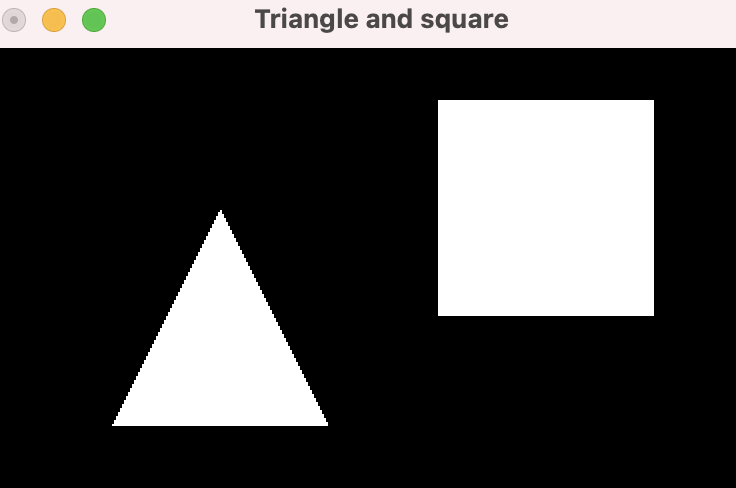

## Cell # 2
In this cell we draw same two polygons:
1. a three side polygon of triangle
2. a four side polygon of square

The parameter `glColor3f` is specified, and for the square it's a bluish color for the whole polygon, whereas for the triangle it's a red color for the top part, green for the right and blue for the left. As a result, the middle of the triangle combines all three colors. The background color of the scene is set to black with the command `glClearColor`. We do the positioning on the screen and regulate the view using the command glTranslatef command. We also handle the resizing with the function `ReSizeGLScene(Width, Height)`, so the scene keeps the same aspect ration, angle and distance for the viewer.

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *

# Some api in the chain is translating the keystrokes to a binary string
# so instead of saying: ESCAPE = 27, we use the following.
ESCAPE = b'\x1b'

# Number of the glut window.
window = 0

# A general OpenGL initialization function.  Sets all of the initial parameters. 
def InitGL(Width, Height):              # We call this right after our OpenGL window is created.
    glClearColor(0.0, 0.0, 0.0, 0.0)    # This Will Clear The Background Color To Black
    glClearDepth(1.0)                   # Enables Clearing Of The Depth Buffer
    glDepthFunc(GL_LESS)                # The Type Of Depth Test To Do
    glEnable(GL_DEPTH_TEST)             # Enables Depth Testing
    glShadeModel(GL_SMOOTH)             # Enables Smooth Color Shading

    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()                    # Reset The Projection Matrix
                                        # Calculate The Aspect Ratio Of The Window
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)

    glMatrixMode(GL_MODELVIEW)

# The function called when our window is resized (which shouldn't happen if you enable fullscreen, below)
def ReSizeGLScene(Width, Height):
    if Height == 0:# Prevent A Divide By Zero If The Window Is Too Small 
        Height = 1

    glViewport(0, 0, Width, Height)    # Reset The Current Viewport And Perspective Transformation
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)
    glMatrixMode(GL_MODELVIEW)

# The main drawing function. 
def DrawGLScene():
    # Clear The Screen And The Depth Buffer
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    glLoadIdentity()# Reset The View 

    # Move Left 1.5 units and into the screen 6.0 units.
    glTranslatef(-1.5, 0.0, -6.0)

    # Draw a triangle
    glBegin(GL_POLYGON)                 # Start drawing a polygon
    glColor3f(1.0, 0.0, 0.0)            # Red
    glVertex3f(0.0, 1.0, 0.0)           # Top
    glColor3f(0.0, 1.0, 0.0)            # Green
    glVertex3f(1.0, -1.0, 0.0)          # Bottom Right
    glColor3f(0.0, 0.0, 1.0)            # Blue
    glVertex3f(-1.0, -1.0, 0.0)         # Bottom Left
    glEnd()                             # We are done with the polygon


    # Move Right 3.0 units.
    glTranslatef(3.0, 0.0, 0.0)

    # Draw a square (quadrilateral)
    glColor3f(0.3, 0.5, 1.0)            # Bluish shade
    glBegin(GL_QUADS)                   # Start drawing a 4 sided polygon
    glVertex3f(-1.0, 1.0, 0.0)          # Top Left
    glVertex3f(1.0, 1.0, 0.0)           # Top Right
    glVertex3f(1.0, -1.0, 0.0)          # Bottom Right
    glVertex3f(-1.0, -1.0, 0.0)         # Bottom Left
    glEnd()                             # We are done with the polygon

    #  since this is double buffered, swap the buffers to display what just got drawn. 
    glutSwapBuffers()

# The function called whenever a key is pressed. Note the use of Python tuples to pass in: (key, x, y)  
def keyPressed(*args):
    print(args[0])
    # If escape is pressed, kill everything.
    if args[0]==ESCAPE:
        glutDestroyWindow(window)
        sys.exit(0)

def main():
    global window
    
    # glut initialization
    glutInit("")

    # Select type of Display mode:   
    #  Double buffer 
    #  RGBA color
    # Alpha components supported 
    # Depth buffer
    glutInitDisplayMode(GLUT_RGBA | GLUT_DOUBLE | GLUT_ALPHA | GLUT_DEPTH)
    
    # get a 640 x 480 window 
    glutInitWindowSize(640, 480)
    
    # the window starts at the upper left corner of the screen 
    glutInitWindowPosition(0, 0)
    
    # Window creation
    window = glutCreateWindow(b"Colored triangle and square")

    # Pass drawing function to glut
    glutDisplayFunc(DrawGLScene)
    
    # Uncomment this line to get full screen.
    #glutFullScreen()

    # When we are doing nothing, redraw the scene.
    glutIdleFunc(DrawGLScene)
    
    # Register the function called when our window is resized.
    glutReshapeFunc(ReSizeGLScene)

    # Register the function called when the keyboard is pressed.  
    glutKeyboardFunc(keyPressed)

    # Initialize our window. 
    InitGL(640, 480)

    # Start Event Processing Engine	
    glutMainLoop()

# Print message to console, and kick off the main to get it rolling.
print("Hit ESC key to quit.")
main()

Hit ESC key to quit.
b'\x1b'


Obtained image:
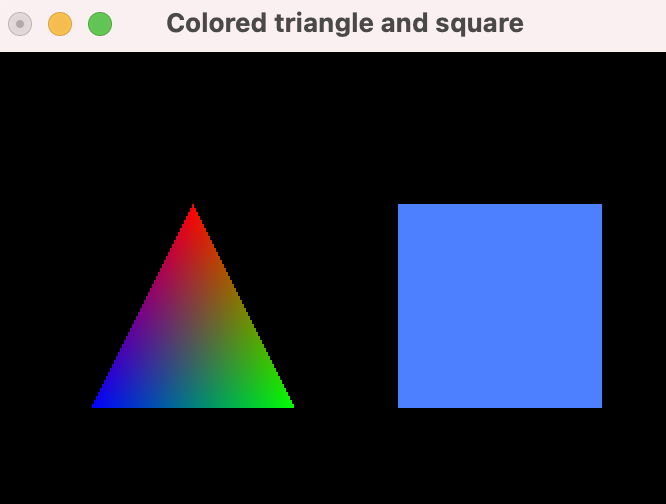

## Cell # 3
In this cell we draw same two polygons with the same colors as above:
1. a three side polygon of triangle 
2. a four side polygon of square

Additionally, we add a rotation around the axe X for the square, and rotation around the axe Y for the triangle. Parameter `rtri` defines the rotation angle for the triangle, the bigger is the parameter the faster is the rotation. It's negative or positive value defines the direction of the rotation around the axe. Parameter `rquad` defines the rotation angle for the square figure.

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *

# Some api in the chain is translating the keystrokes to this binary string
# so instead of saying: ESCAPE = 27, we use the following.
ESCAPE = b'\x1b'

# Number of the glut window.
window = 0

# rotation angle for the triangle
rtri = 0.0

# rotation angle for the square
rquad = 0.0

# A general OpenGL initialization function.  Sets all of the initial parameters. 
def InitGL(Width, Height):              # We call this right after our OpenGL window is created.
    glClearColor(0.0, 0.0, 0.0, 0.0)    # This Will Clear The Background Color To Black
    glClearDepth(1.0)                   # Enables Clearing Of The Depth Buffer
    glDepthFunc(GL_LESS)                # The Type Of Depth Test To Do
    glEnable(GL_DEPTH_TEST)             # Enables Depth Testing
    glShadeModel(GL_SMOOTH)             # Enables Smooth Color Shading

    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()                    # Reset The Projection Matrix
                                        # Calculate The Aspect Ratio Of The Window
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)

    glMatrixMode(GL_MODELVIEW)

# The function called when our window is resized (which shouldn't happen if you enable fullscreen, below)
def ReSizeGLScene(Width, Height):
    if Height == 0:                     # Prevent A Divide By Zero If The Window Is Too Small 
        Height = 1

    glViewport(0, 0, Width, Height)     # Reset The Current Viewport And Perspective Transformation
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)
    glMatrixMode(GL_MODELVIEW)

# The main drawing function. 
def DrawGLScene():
    global rtri, rquad

    # Clear The Screen And The Depth Buffer
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    glLoadIdentity()                   # Reset The View 

    # Move Left 1.5 units and into the screen 6.0 units.
    glTranslatef(-1.5, 0.0, -6.0)

    # We have smooth color mode on, this will blend across the vertices.
    # Draw a triangle rotated on the Y axis. 
    glRotatef(rtri, 0.0, 1.0, 0.0)      # Rotate
    glBegin(GL_POLYGON)                 # Start drawing a polygon
    glColor3f(1.0, 0.0, 0.0)            # Red
    glVertex3f(0.0, 1.0, 0.0)           # Top
    glColor3f(0.0, 1.0, 0.0)            # Green
    glVertex3f(1.0, -1.0, 0.0)          # Bottom Right
    glColor3f(0.0, 0.0, 1.0)            # Blue
    glVertex3f(-1.0, -1.0, 0.0)         # Bottom Left
    glEnd()                             # We are done with the polygon

    # We are "undoing" the rotation so that we may rotate the quad on its own axis.
    # We also "undo" the prior translate.  This could also have been done using the
    # matrix stack.
    glLoadIdentity()

    # Move Right 1.5 units and into the screen 6.0 units.
    glTranslatef(1.5, 0.0, -6.0)

    # Draw a square (quadrilateral) rotated on the X axis.
    glRotatef(rquad, 3.0, 0.0, 0.0)     # Rotate 
    glColor3f(0.3, 0.5, 1.0)            # Bluish shade
    glBegin(GL_QUADS)                   # Start drawing a 4 sided polygon
    glVertex3f(-1.0, 1.0, 0.0)          # Top Left
    glVertex3f(1.0, 1.0, 0.0)           # Top Right
    glVertex3f(1.0, -1.0, 0.0)          # Bottom Right
    glVertex3f(-1.0, -1.0, 0.0)         # Bottom Left
    glEnd()                             # We are done with the polygon

    # What values to use?  Well, if you have a FAST machine and a FAST 3D Card, then
    # large values make an unpleasant display with flickering and tearing.  I found that
    # smaller values work better, but this was based on my experience.
    rtri  = rtri + 0.2                  # This defines the angle of the rotation. The triangle with positive angle will start rotation around Y axe from left to right, reverse clockwise
    rquad = rquad - 0.2                 # This defines the angle of the rotation. The square with negative angle will start rotation around X axe backwards, clockwise


    #  since this is double buffered, swap the buffers to display what just got drawn. 
    glutSwapBuffers()

# The function called whenever a key is pressed. Note the use of Python tuples to pass in: (key, x, y)  
def keyPressed(*args):
    print(args[0])
    # If escape is pressed, kill everything.
    if args[0]==ESCAPE:
        glutDestroyWindow(window)
        sys.exit(0)

def main():
    global window
    # glut initialization
    glutInit("")

    # Select type of Display mode:   
    #  Double buffer 
    #  RGBA color
    # Alpha components supported 
    # Depth buffer
    glutInitDisplayMode(GLUT_RGBA | GLUT_DOUBLE | GLUT_ALPHA | GLUT_DEPTH)

    # get a 640 x 480 window 
    glutInitWindowSize(640, 480)

    # the window starts at the upper left corner of the screen 
    glutInitWindowPosition(0, 0)
    
    # Window creation
    window = glutCreateWindow(b"Triangle and square rotation")

    # Pass drawing function to glut
    glutDisplayFunc(DrawGLScene)

    # Uncomment this line to get full screen.
    # glutFullScreen()

    # When we are doing nothing, redraw the scene.
    glutIdleFunc(DrawGLScene)

    # Register the function called when our window is resized.
    glutReshapeFunc(ReSizeGLScene)

    # Register the function called when the keyboard is pressed.
    glutKeyboardFunc(keyPressed)

    # Initialize our window. 
    InitGL(640, 480)

    # Start Event Processing Engine
    glutMainLoop()

# Print message to console, and kick off the main to get it rolling.
print("Hit ESC key to quit.")
main()

Hit ESC key to quit.
b'\x1b'


## Cell # 4
In this cell from the polygons we draw
1. a pyramid made of 4 triangles or 12 vertexes. Each vertex of the triangle has it's own color
2. a cube made of 6 squares or 24 vertexes. Each side of the cube has its own color

Additionally, we add a rotation around the axe Y for the pyramid, and rotation around the all axes X, Y and Z for the cube. Parameter `rtri` defines the rotation angle for the pyramid, the bigger is the parameter the faster is the rotation. It's negative or positive value defines the direction of the rotation around the vector. Parameter `rquad` defines the rotation angle for the cube.

In [ ]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *
import sys

# Some api in the chain is translating the keystrokes to this binary string
# so instead of saying: ESCAPE = 27, we use the following.
ESCAPE = b'\x1b'

# Number of the glut window.
window = 0

# Rotation angle for the pyramid. 
rtri = 0.0

# Rotation angle for the cube.
rquad = 0.0

# A general OpenGL initialization function.  Sets all of the initial parameters. 
def InitGL(Width, Height):              # We call this right after our OpenGL window is created.
    glClearColor(0.0, 0.0, 0.0, 0.0)    # This will clear the background color to black
    glClearDepth(1.0)                   # Enables clearing of the depth buffer
    glDepthFunc(GL_LESS)                # The type Of Depth Test To Do
    glEnable(GL_DEPTH_TEST)             # This enables updates to the depth buffer, so we can test a depth changes during rotation
    glShadeModel(GL_SMOOTH)             # Enables Smooth Color Shading

    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()                    # Reset The Projection Matrix
                                        # Calculate The Aspect Ratio Of The Window
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)

    glMatrixMode(GL_MODELVIEW)

# The function called when our window is resized (which shouldn't happen if you enable fullscreen, below)
def ReSizeGLScene(Width, Height):
    if Height == 0:                     # Prevent A Divide By Zero If The Window Is Too Small 
        Height = 1

    glViewport(0, 0, Width, Height)     # Reset The Current Viewport And Perspective Transformation
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    gluPerspective(45.0, float(Width)/float(Height), 0.1, 100.0)
    glMatrixMode(GL_MODELVIEW)

# library to operate with matrices   
import numpy as np
# The main drawing function. 
def DrawGLScene():
    global rtri, rquad

    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT); # Clear The Screen And The Depth Buffer
    glLoadIdentity();                       # Reset The View
    glTranslatef(-1.5,0.0,-6.0)             # Move Left And Into The Screen

    #glRotatef(rtri,0.0,1.0,0.0)     # Setups rotation of the further pyramid around the Y axis with the angle rtri
    rotationMatrix = np.array([[np.cos(rtri), -np.sin(rtri), 0, 0], [np.sin(rtri), np.cos(rtri), 0, 0], 
                               [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]])
    glMultMatrixd(rotationMatrix.transpose())  #transpose is important as GL takes a column-based array

    glBegin(GL_TRIANGLES)           # Start Drawing The Pyramid

    glColor3f(1.0,0.0,0.0)          # Red
    glVertex3f( 0.0, 1.0, 0.0)      # Top Of Triangle (Front)
    glColor3f(0.0,1.0,0.0)          # Green
    glVertex3f(-1.0,-1.0, 1.0)      # Left Of Triangle (Front)
    glColor3f(0.0,0.0,1.0)          # Blue
    glVertex3f( 1.0,-1.0, 1.0)

    glColor3f(1.0,0.0,0.0)          # Red
    glVertex3f( 0.0, 1.0, 0.0)      # Top Of Triangle (Right)
    glColor3f(0.0,0.0,1.0)          # Blue
    glVertex3f( 1.0,-1.0, 1.0)      # Left Of Triangle (Right)
    glColor3f(0.0,1.0,0.0)          # Green
    glVertex3f( 1.0,-1.0, -1.0)     # Right 

    glColor3f(1.0,0.0,0.0)          # Red
    glVertex3f( 0.0, 1.0, 0.0)      # Top Of Triangle (Back)
    glColor3f(0.0,1.0,0.0)          # Green
    glVertex3f( 1.0,-1.0, -1.0)     # Left Of Triangle (Back)
    glColor3f(0.0,0.0,1.0)          # Blue
    glVertex3f(-1.0,-1.0, -1.0)     # Right Of 

    glColor3f(1.0,0.0,0.0)          # Red
    glVertex3f( 0.0, 1.0, 0.0)      # Top Of Triangle (Left)
    glColor3f(0.0,0.0,1.0)          # Blue
    glVertex3f(-1.0,-1.0,-1.0)      # Left Of Triangle (Left)
    glColor3f(0.0,1.0,0.0)          # Green
    glVertex3f(-1.0,-1.0, 1.0)      # Right Of Triangle (Left)
    glEnd()

    glLoadIdentity()
    glTranslatef(1.5,0.0,-7.0)      # Move Right And Into The Screen
    glRotatef(rquad,1.0,1.0,1.0)    # Setups rotation of the futher cube around all three axis with the angle rquad
    glBegin(GL_QUADS)               # Start Drawing The Cube


    glColor3f(0.0,1.0,0.0)          # Set The Color To Blue
    glVertex3f( 1.0, 1.0,-1.0)      # Top Right Of The Quad (Top)
    glVertex3f(-1.0, 1.0,-1.0)      # Top Left Of The Quad (Top)
    glVertex3f(-1.0, 1.0, 1.0)      # Bottom Left Of The Quad (Top)
    glVertex3f( 1.0, 1.0, 1.0)      # Bottom Right Of The Quad (Top)

    glColor3f(1.0,0.5,0.0)          # Set The Color To Orange
    glVertex3f( 1.0,-1.0, 1.0)      # Top Right Of The Quad (Bottom)
    glVertex3f(-1.0,-1.0, 1.0)      # Top Left Of The Quad (Bottom)
    glVertex3f(-1.0,-1.0,-1.0)      # Bottom Left Of The Quad (Bottom)
    glVertex3f( 1.0,-1.0,-1.0)      # Bottom Right Of The Quad (Bottom)

    glColor3f(1.0,0.0,0.0)          # Set The Color To Red
    glVertex3f( 1.0, 1.0, 1.0)      # Top Right Of The Quad (Front)
    glVertex3f(-1.0, 1.0, 1.0)      # Top Left Of The Quad (Front)
    glVertex3f(-1.0,-1.0, 1.0)      # Bottom Left Of The Quad (Front)
    glVertex3f( 1.0,-1.0, 1.0)      # Bottom Right Of The Quad (Front)

    glColor3f(1.0,1.0,0.0)          # Set The Color To Yellow
    glVertex3f( 1.0,-1.0,-1.0)      # Bottom Left Of The Quad (Back)
    glVertex3f(-1.0,-1.0,-1.0)      # Bottom Right Of The Quad (Back)
    glVertex3f(-1.0, 1.0,-1.0)      # Top Right Of The Quad (Back)
    glVertex3f( 1.0, 1.0,-1.0)      # Top Left Of The Quad (Back)

    glColor3f(0.0,0.0,1.0)          # Set The Color To Blue
    glVertex3f(-1.0, 1.0, 1.0)      # Top Right Of The Quad (Left)
    glVertex3f(-1.0, 1.0,-1.0)      # Top Left Of The Quad (Left)
    glVertex3f(-1.0,-1.0,-1.0)      # Bottom Left Of The Quad (Left)
    glVertex3f(-1.0,-1.0, 1.0)      # Bottom Right Of The Quad (Left)

    glColor3f(1.0,0.0,1.0)          # Set The Color To Violet
    glVertex3f( 1.0, 1.0,-1.0)      # Top Right Of The Quad (Right)
    glVertex3f( 1.0, 1.0, 1.0)      # Top Left Of The Quad (Right)
    glVertex3f( 1.0,-1.0, 1.0)      # Bottom Left Of The Quad (Right)
    glVertex3f( 1.0,-1.0,-1.0)      # Bottom Right Of The Quad (Right)
    glEnd()                         # Done Drawing The Quad

    # What values to use?  Well, if you have a FAST machine and a FAST 3D Card, then
    # large values make an unpleasant display with flickering and tearing.  I found that
    # smaller values work better, but this was based on my experience.
    rtri  = rtri + 0.1                    # This defines the angle of the rotation. The pyramid with positive angle will start rotation around Y axe from left to right, reverse clockwise
    rquad = rquad - 0.2                   # This defines the angle of the rotation. The cube with positive angle will start rotation around Y axe from left to right, reverse clockwise


    #  since this is double buffered, swap the buffers to display what just got drawn. 
    glutSwapBuffers()

# The function called whenever a key is pressed. Note the use of Python tuples to pass in: (key, x, y)  
def keyPressed(*args):
    print(args[0])
    # If escape is pressed, kill everything.
    if args[0]==ESCAPE:
        glutDestroyWindow(window)
        sys.exit(0)

def main():
    global window

    glutInit("")

    # Select type of Display mode:   
    #  Double buffer 
    #  RGBA color
    # Alpha components supported 
    # Depth buffer
    glutInitDisplayMode(GLUT_RGBA | GLUT_DOUBLE | GLUT_ALPHA | GLUT_DEPTH)
    
    # Get a 640 x 480 window 
    glutInitWindowSize(640, 480)

    # The window starts at the upper left corner of the screen 
    glutInitWindowPosition(0, 0)

    # Window creation
    window = glutCreateWindow(b"Pyramid and cube rotation")

    # Pass drawing function to glut
    glutDisplayFunc(DrawGLScene)
    #glutDisplayFunc()

    # Uncomment this line to get full screen.
    # glutFullScreen()

    # When we are doing nothing, redraw the scene.
    glutIdleFunc(DrawGLScene)

    # Register the function called when our window is resized.
    glutReshapeFunc(ReSizeGLScene)


    # Register the function called when the keyboard is pressed.  
    glutKeyboardFunc(keyPressed)
    
    # Initialize our window. 
    InitGL(640, 480)
    
    # Start Event Processing Engine
    glutMainLoop()


# Print message to console, and kick off the main to get it rolling.
print("Hit ESC key to quit.")
main()
    

Hit ESC key to quit.
b'\x1b'
